In [1]:
#dataset link: https://drive.google.com/drive/folders/1n67sVTTzye4jtLfk8n-sa2fH2gTx5Ywt?usp=share_link

In [2]:
import tensorflow as tf
import numpy as np
import os
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc

DATA_DIR = "../Dataset Korosi/"

In [3]:
## resep yang nemu di: https://www.kaggle.com/code/vortexkol/alexnet-cnn-architecture-on-tensorflow-beginner

# model_alexnet = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,3)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2)),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(3,3)),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2)),

#     tf.keras.layers.Flatten(),

#     tf.keras.layers.Dense(1024,activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(1024,activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(3,activation='softmax')  
# ])

## resep yang nemu di: https://medium.com/swlh/alexnet-with-tensorflow-46f366559ce8
def create_model(size):

    model_alexnet = tf.keras.models.Sequential()
    model_alexnet.add(tf.keras.layers.experimental.preprocessing.Resizing(size, size, interpolation="bilinear", input_shape=(size,size,3)))
    model_alexnet.add(tf.keras.layers.Conv2D(96, 11, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.MaxPooling2D(3, strides=2))
    model_alexnet.add(tf.keras.layers.Conv2D(256, 5, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.MaxPooling2D(3, strides=2))
    model_alexnet.add(tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.Conv2D(256, 3, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.Flatten())
    model_alexnet.add(tf.keras.layers.Dense(4096, activation='relu'))
    model_alexnet.add(tf.keras.layers.Dropout(0.5))
    model_alexnet.add(tf.keras.layers.Dense(4096, activation='relu'))
    model_alexnet.add(tf.keras.layers.Dropout(0.5))
    model_alexnet.add(tf.keras.layers.Dense(3, activation='softmax'))

    return model_alexnet


In [4]:
model_alexnet = create_model(128)
model_alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 32, 32, 96)        0         
                                                                 
 activation (Activation)     (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                        

In [5]:
import matplotlib.pyplot as plt

In [6]:
f = open("alexnet_pengujian_resize.csv", "w")
f.write("size,loss,val_loss,acc,val_acc")
f.close()

f = open("alexnet_pengujian_resize_model_summary.txt", "w")
f.write("--------==== hasil model summary dari percobaan resize ====--------")
f.close()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 128, 128, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 96)        34944     
                                                                 
 lambda_2 (Lambda)           (None, 32, 32, 96)        0         
                                                                 
 activation_5 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 256)         614656    
                                                      

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

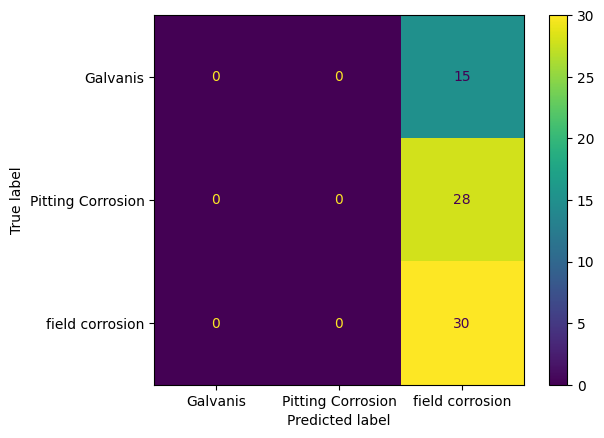

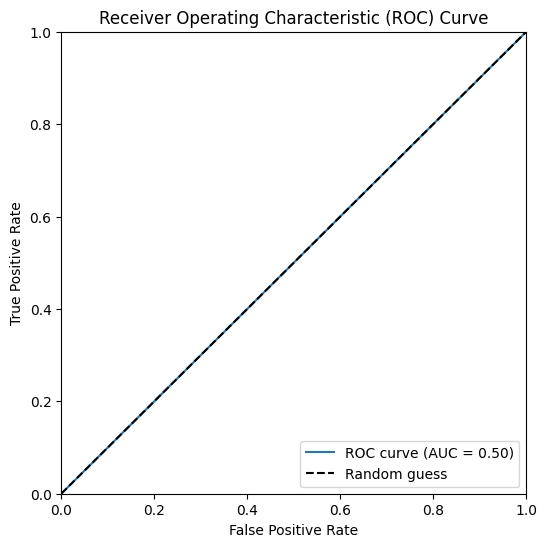

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_2 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 lambda_4 (Lambda)           (None, 56, 56, 96)        0         
                                                                 
 activation_10 (Activation)  (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 256)         614656    
                                                      

<Figure size 640x480 with 0 Axes>

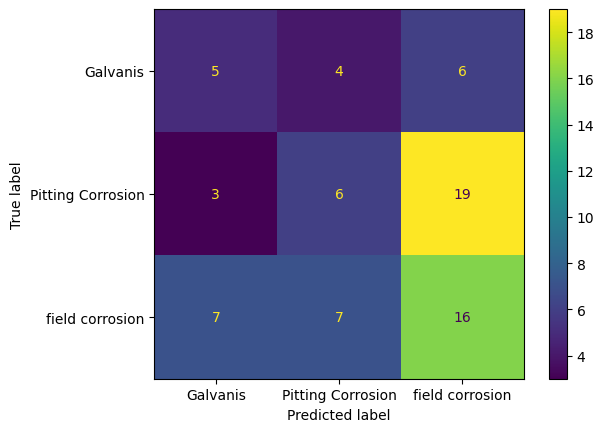

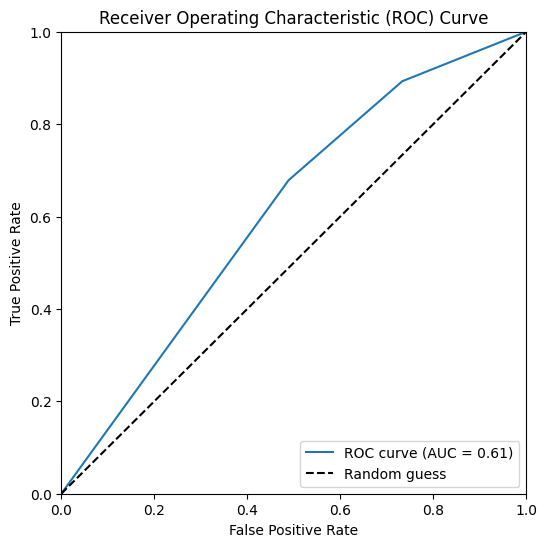

<Figure size 640x480 with 0 Axes>

In [7]:
# DHUPEE TERITORRY
TEST_DATA_DIR = '../testdata'
SIZES = [128,224]

for size in SIZES:
    model_alexnet = create_model(size)
    
    f = open("alexnet_pengujian_resize_model_summary.txt", "a")
    f.write("\n Ukuran gambar: "+str(size)+" \n"+
       str(model_alexnet.summary())
    )
    f.close()

    Wsave = model_alexnet.get_weights()
    tf.keras.utils.plot_model(model_alexnet,to_file=str(size)+"alexnet.png")
    
        
    training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
        )

    test_datagen = ImageDataGenerator(
        rescale = 1./255
    )

    train_generator = training_datagen.flow_from_directory(DATA_DIR,  
                                                            subset='training',
                                                            batch_size=16,
                                                            class_mode='categorical',
                                                            target_size=(size,size))   
    val_generator = training_datagen.flow_from_directory(DATA_DIR, 
                                                            subset='validation', 
                                                            batch_size=16,
                                                            class_mode='categorical',
                                                            target_size=(size,size))
    test_generator = test_datagen.flow_from_directory(TEST_DATA_DIR, 
                                                            batch_size=16,
                                                            class_mode='categorical',
                                                            target_size=(size,size)) 

    model_alexnet.set_weights(Wsave)
    model_alexnet.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'])
    history = model_alexnet.fit(train_generator,validation_data=val_generator,epochs=50, verbose = 2)

    f = open("alexnet_pengujian_resize.csv", "a")
    f.write("\n"+str(size)+","+
        str(history.history['loss'][-1])+","+
        str(history.history['val_loss'][-1])+","+
        str(history.history['acc'][-1])+","+
        str(history.history['val_acc'][-1])
    )
    f.close()

    loss, accuracy = model_alexnet.evaluate(test_generator)
    print(f'Test accuracy: {accuracy * 100}%')
    print(f'Test loss: {loss}')

    # prediction = model_alexnet.predict(test_generator)
    # print(prediction)
     
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Model')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./alexnet/loss_'+str(size)+'.png')
    plt.cla()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./alexnet/acc_'+str(size)+'.png')
    
    plt.clf()


    PLOT_PARAM = size # CHANGE THIS PARAMETER DEPEND ON THE SIZE
    # Making Confusion Matrix
    # Get the predictions for the test data
    test_pred = np.argmax(model_alexnet.predict(test_generator), axis=1)
    test_label_num = test_generator.labels
    test_label_classes = test_generator.class_indices

    # convert the numerical label into string one by extracting the key
    test_label_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_label_num]
    test_pred_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_pred]

    # Create the confusion matrix
    conf_mat = ConfusionMatrixDisplay.from_predictions(
        test_label_str, test_pred_str
    )

    fig, ax = plt.subplots(figsize=(6,6))
    conf_mat.plot(ax=ax)
    ax.set_title('Confusion Matrix')
    # fig.subplots_adjust(right=1) # Adjust the layout to align the plot to the right 
    plt.savefig(f'./alexnet/confusion_matrix_{PLOT_PARAM}.png')
    plt.clf()

    # print the classification report
    clas_rep = classification_report(test_label_str, test_pred_str)

    # # Save the markdown table to a file
    with open(f'./alexnet/classification_report_{PLOT_PARAM}.txt', 'w') as f:
        f.write(clas_rep)
    # print(clas_rep)

    # ROC curve
    # calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(test_label_num, test_pred, pos_label=1)

    # calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.savefig(f'./alexnet/roc_curve_{PLOT_PARAM}.png')
    plt.show()
    plt.clf()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 128, 128, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 96)        34944     
                                                                 
 lambda_6 (Lambda)           (None, 32, 32, 96)        0         
                                                                 
 activation_15 (Activation)  (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 96)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 4, 4, 256)         614656    
                                                      

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

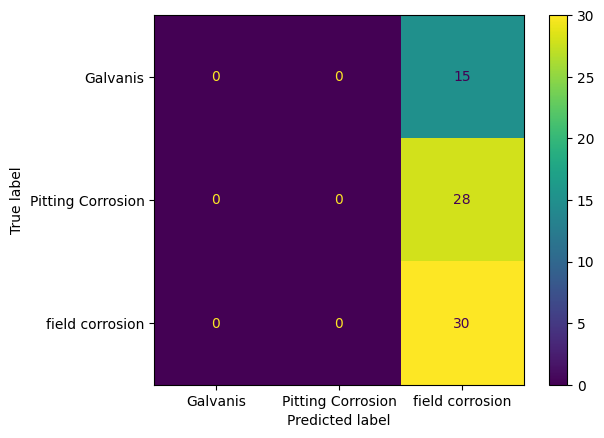

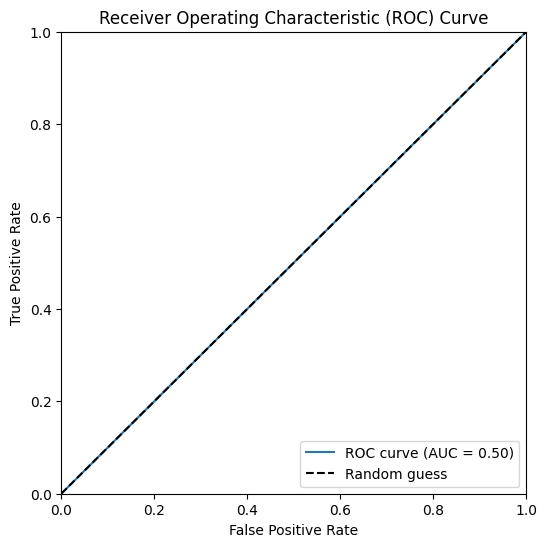

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_4 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 lambda_8 (Lambda)           (None, 56, 56, 96)        0         
                                                                 
 activation_20 (Activation)  (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 256)         614656    
                                                      

<Figure size 640x480 with 0 Axes>

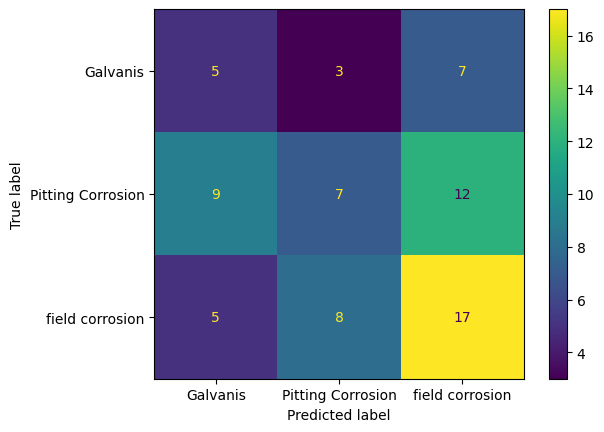

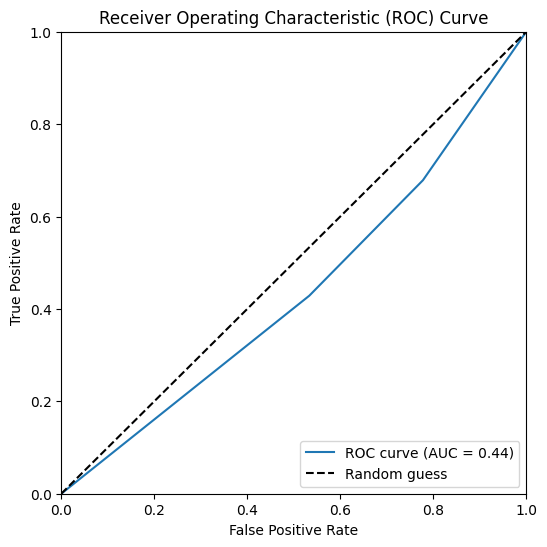

<Figure size 640x480 with 0 Axes>

In [8]:
TEST_DATA_DIR = '../testdata'
SIZES = [128,224]

for size in SIZES:
    model_alexnet = create_model(size)
    
    f = open("alexnet_pengujian_resize_model_summary.txt", "a")
    f.write("\n Ukuran gambar: "+str(size)+" \n"+
       str(model_alexnet.summary())
    )
    f.close()

    Wsave = model_alexnet.get_weights()
    tf.keras.utils.plot_model(model_alexnet,to_file=str(size)+"alexnet.png")    
    training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
        )

    test_datagen = ImageDataGenerator(
        rescale = 1./255
    )

    train_generator = training_datagen.flow_from_directory(DATA_DIR,  
                                                            subset='training',
                                                            batch_size=16,
                                                            class_mode='categorical',
                                                            target_size=(size,size))   
    val_generator = training_datagen.flow_from_directory(DATA_DIR, 
                                                            subset='validation', 
                                                            batch_size=16,
                                                            class_mode='categorical',
                                                            target_size=(size,size))
    test_generator = test_datagen.flow_from_directory(TEST_DATA_DIR, 
                                                            batch_size=16,
                                                            class_mode='categorical',
                                                            target_size=(size,size)) 

    model_alexnet.set_weights(Wsave)
    model_alexnet.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'])
    history = model_alexnet.fit(train_generator,validation_data=val_generator,epochs=50, verbose = 2)

    f = open("alexnet_pengujian_resize.csv", "a")
    f.write("\n"+str(size)+","+
        str(history.history['loss'][-1])+","+
        str(history.history['val_loss'][-1])+","+
        str(history.history['acc'][-1])+","+
        str(history.history['val_acc'][-1])
    )
    f.close()
     
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Model')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./alexnet/loss_'+str(size)+'.png')
    plt.cla()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./alexnet/acc_'+str(size)+'.png')
    
    plt.clf()

    PLOT_PARAM = size # CHANGE THIS PARAMETER DEPEND ON THE SIZE
    # Making Confusion Matrix
    # Get the predictions for the test data
    test_pred = np.argmax(model_alexnet.predict(test_generator), axis=1)
    test_label_num = test_generator.labels
    test_label_classes = test_generator.class_indices

    # convert the numerical label into string one by extracting the key
    test_label_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_label_num]
    test_pred_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_pred]

    # Create the confusion matrix
    conf_mat = ConfusionMatrixDisplay.from_predictions(
        test_label_str, test_pred_str
    )

    fig, ax = plt.subplots(figsize=(6,6))
    conf_mat.plot(ax=ax)
    ax.set_title('Confusion Matrix')
    # fig.subplots_adjust(right=1) # Adjust the layout to align the plot to the right 
    plt.savefig(f'./alexnet/confusion_matrix_{PLOT_PARAM}.png')
    plt.clf()

    # print the classification report
    clas_rep = classification_report(test_label_str, test_pred_str)

    # # Save the markdown table to a file
    with open(f'./alexnet/classification_report_{PLOT_PARAM}.txt', 'w') as f:
        f.write(clas_rep)
    # print(clas_rep)

    # ROC curve
    # calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(test_label_num, test_pred, pos_label=1)

    # calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.savefig(f'./alexnet/roc_curve_{PLOT_PARAM}.png')
    plt.show()
    plt.clf()

In [9]:
def create_mobilenet(size):

    mobilenet = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(size,size,3),
    weights=None,
    include_top=False,
    )
    
    model_mobilenet = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer( input_shape=(size,size,3)),
    mobilenet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
    ])
    return model_mobilenet

mobilenet = create_mobilenet(64)
mobilenet.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_64 (Functi  (None, 2, 2, 1280)       2257984   
 onal)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 5120)              0         
                                                                 
 dropout_10 (Dropout)        (None, 5120)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               2621952   
                                                                 
 dense_16 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 4,881,475
Trainable params: 4,847,363
Non-trainable params: 34,112
_______________________________________

In [10]:
f = open("mobilenet_pengujian_resize.csv", "w")
f.write("size,loss,val_loss,acc,val_acc")
f.close()

f = open("mobilenet_pengujian_resize_model_summary.txt", "w")
f.write("--------==== hasil model summary dari percobaan resize ====--------")
f.close()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_64 (Functi  (None, 2, 2, 1280)       2257984   
 onal)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 5120)              0         
                                                                 
 dropout_11 (Dropout)        (None, 5120)              0         
                                                                 
 dense_17 (Dense)            (None, 512)               2621952   
                                                                 
 dense_18 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 4,881,475
Trainable params: 4,847,363
Non-trainable params: 34,112
_______________________________________

<Figure size 640x480 with 0 Axes>

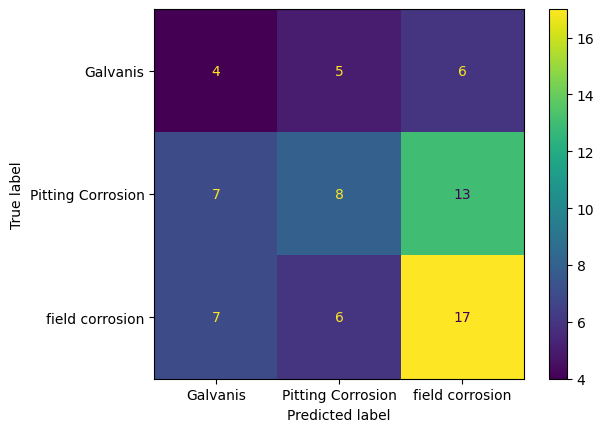

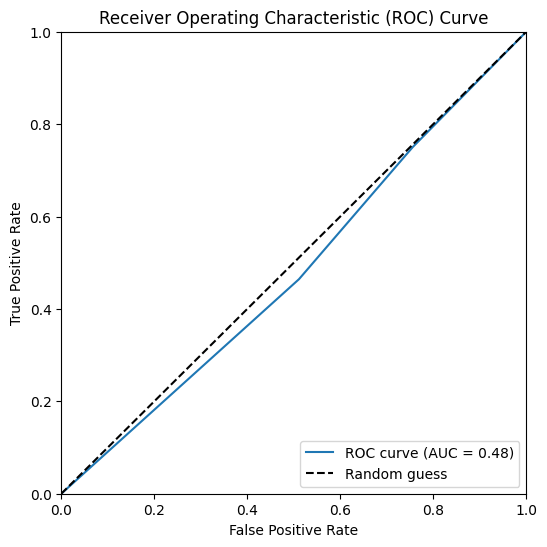

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_7 (Flatten)         (None, 20480)             0         
                                                                 
 dropout_12 (Dropout)        (None, 20480)             0         
                                                                 
 dense_19 (Dense)            (None, 512)               10486272  
                                                                 
 dense_20 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 12,745,795
Trainable params: 12,711,683
Non-trainable params: 34,112
_____________________________________

<Figure size 640x480 with 0 Axes>

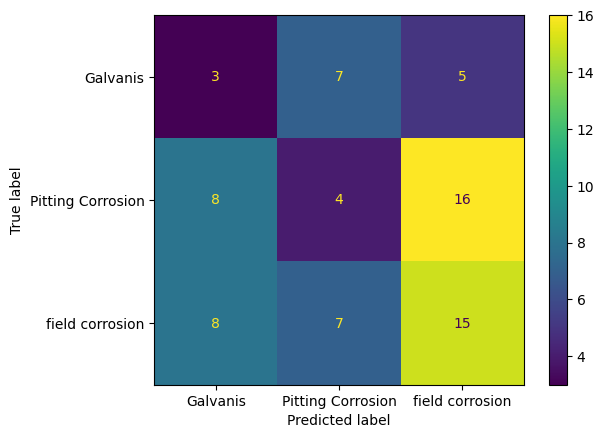

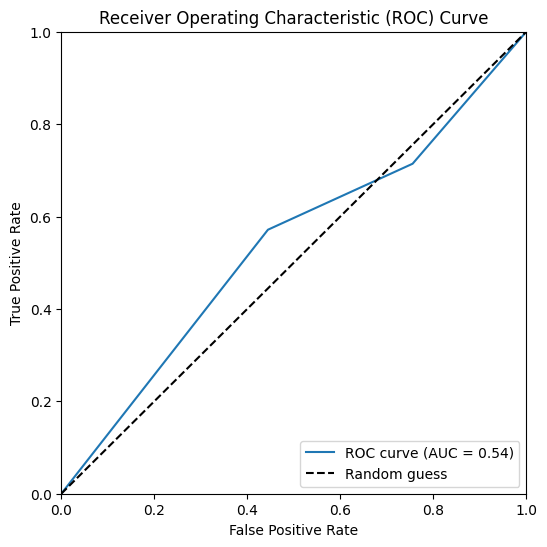

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_8 (Flatten)         (None, 62720)             0         
                                                                 
 dropout_13 (Dropout)        (None, 62720)             0         
                                                                 
 dense_21 (Dense)            (None, 512)               32113152  
                                                                 
 dense_22 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 34,372,675
Trainable params: 34,338,563
Non-trainable params: 34,112
_____________________________________

<Figure size 640x480 with 0 Axes>

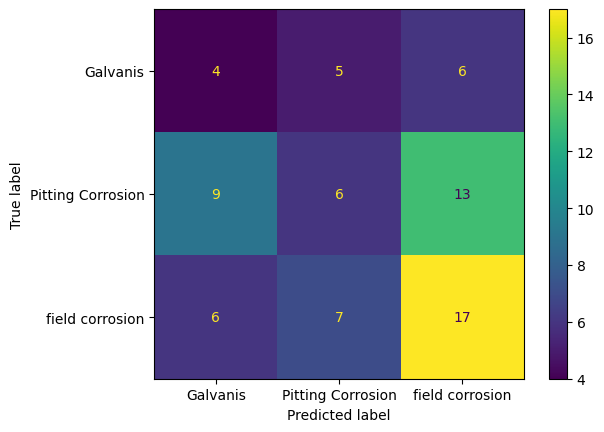

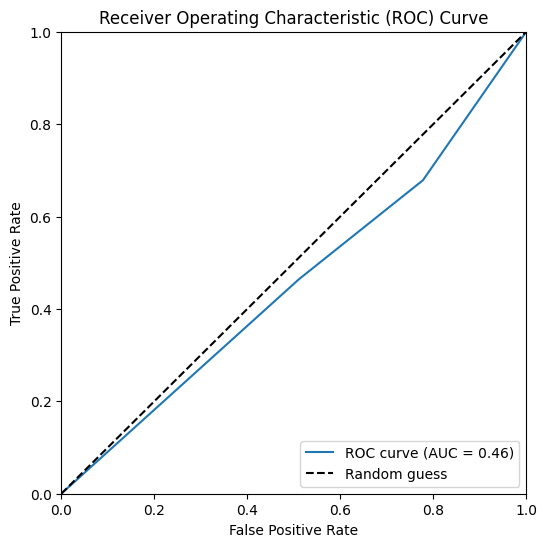

<Figure size 640x480 with 0 Axes>

In [11]:
TEST_DATA_DIR = '../testdata'
SIZES = [64,128,224]

for size in SIZES:
    mobilenet = create_mobilenet(size)
    
    f = open("mobilenet_pengujian_resize_model_summary.txt", "a")
    f.write("\n Ukuran gambar: "+str(size)+" \n"+
       str(mobilenet.summary())
    )
    f.close()

    Wsave = mobilenet.get_weights()
    tf.keras.utils.plot_model(mobilenet,to_file=str(size)+"mobilenet.png")    
    training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
        )

    test_datagen = ImageDataGenerator(
        rescale = 1./255
    )

    train_generator = training_datagen.flow_from_directory(DATA_DIR,  
                                                            subset='training',
                                                            batch_size=16,
                                                            class_mode='categorical',
                                                            target_size=(size,size))   
    val_generator = training_datagen.flow_from_directory(DATA_DIR, 
                                                            subset='validation', 
                                                            batch_size=16,
                                                            class_mode='categorical',
                                                            target_size=(size,size))
    test_generator = test_datagen.flow_from_directory(TEST_DATA_DIR, 
                                                            batch_size=16,
                                                            class_mode='categorical',
                                                            target_size=(size,size)) 
    mobilenet.set_weights(Wsave)
    mobilenet.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'])
    history = mobilenet.fit(train_generator,validation_data=val_generator,epochs=50, verbose = 2)

    f = open("mobilenet_pengujian_resize.csv", "a")
    f.write("\n"+str(size)+","+
        str(history.history['loss'][-1])+","+
        str(history.history['val_loss'][-1])+","+
        str(history.history['acc'][-1])+","+
        str(history.history['val_acc'][-1])
    )
    f.close()
     
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Model')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./mobilenet/loss_'+str(size)+'.png')
    plt.cla()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./mobilenet/acc_'+str(size)+'.png')
    
    plt.clf()

    PLOT_PARAM = size # CHANGE THIS PARAMETER DEPEND ON THE SIZE
    # Making Confusion Matrix
    # Get the predictions for the test data
    test_pred = np.argmax(model_alexnet.predict(test_generator), axis=1)
    test_label_num = test_generator.labels
    test_label_classes = test_generator.class_indices

    # convert the numerical label into string one by extracting the key
    test_label_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_label_num]
    test_pred_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_pred]

    # Create the confusion matrix
    conf_mat = ConfusionMatrixDisplay.from_predictions(
        test_label_str, test_pred_str
    )

    fig, ax = plt.subplots(figsize=(6,6))
    conf_mat.plot(ax=ax)
    ax.set_title('Confusion Matrix')
    # fig.subplots_adjust(right=1) # Adjust the layout to align the plot to the right 
    plt.savefig(f'./mobilenet/confusion_matrix_{PLOT_PARAM}.png')
    plt.clf()

    # print the classification report
    clas_rep = classification_report(test_label_str, test_pred_str)

    # # Save the markdown table to a file
    with open(f'./mobilenet/classification_report_{PLOT_PARAM}.txt', 'w') as f:
        f.write(clas_rep)
    # print(clas_rep)

    # ROC curve
    # calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(test_label_num, test_pred, pos_label=1)

    # calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.savefig(f'./mobilenet/roc_curve_{PLOT_PARAM}.png')
    plt.show()
    plt.clf()